# Assignment: Trees in forest of fishing attacks

## Assignment Understanding

 Phishing attacks are the most common type of cyber-attacks used to obtain sensitive information and have been affecting individuals as well as organizations across the globe. We assume that Decision tree and random forest might be effective for protecting users as automated system that can <del>somehow</del> reliably identify phishing websites. It might be especially useful as sheer volume of new websites created daily makes it unrealistic to manually detect these malicious sites.

Therefore, our primary goal is to develop a predictive model based on <del>lumberjack</del> decision trees concept and verify that can automatically and accurately classify a website as either legitimate or a phishing - based on a set of observable characteristics. Transparency and readability as well as predictive performance are main objectives that we are aiming for during development.



## Data Understanding

To build our models, we will use the [Phishing Websites Data Set](https://archive.ics.uci.edu/dataset/327/phishing+websites) from the UCI Machine Learning Repository. This dataset contains 11,055 instances (*websites*), each described by 30 features (*extracted from the website's URL and source code*) and a Result target variable.

**The target variable**, `Result`, is binary:

* `-1`: Phishing website.
* `1`: Legitimate website.

**The Features** are categorical, represented by the values `{-1, 0, 1}`.

* `-1`: Indicates the presence of a phishing characteristic.
* `1`: Indicates the presence of a legitimate characteristic.
* `0`: Can be interpreted as a neutral or suspicious state.

**Detailed descriptions:**

| Feature Name               | Description | Values |
|-----------------------------|-------------|--------|
| having_ip_address           | Checks if an IP address is used instead of a domain name in the URL. | Legitimate (1), Phishing (-1) |
| url_length                  | Length of the URL; long URLs may hide suspicious parts. | Legitimate (1), Suspicious (0), Phishing (-1) |
| shortining_service          | Whether a URL shortening service (e.g., bit.ly) is used. | Legitimate (1), Phishing (-1) |
| having_at_symbol            | Presence of “@” symbol in the URL, which can obscure the true address. | Legitimate (1), Phishing (-1) |
| double_slash_redirecting    | Presence and location of “//” in the URL path (may redirect). | Legitimate (1), Phishing (-1) |
| prefix_suffix               | Usage of “-” in the domain (rare in legitimate URLs). | Legitimate (1), Phishing (-1) |
| having_sub_domain           | Count of subdomains in the URL; multiple subdomains can be suspicious. | Legitimate (1), Suspicious (0), Phishing (-1) |
| sslfinal_state              | Presence and validity of HTTPS/SSL certificate. | Legitimate (1), Suspicious (0), Phishing (-1) |
| domain_registration_length  | Domain age based on WHOIS info; short-lived domains are suspicious. | Legitimate (1), Phishing (-1) |
| favicon                     | Whether favicon is loaded from another domain. | Legitimate (1), Phishing (-1) |
| port                        | Usage of non-standard or uncommon ports. | Legitimate (1), Phishing (-1) |
| https_token                 | Presence of misleading “https” token in the domain part of the URL. | Legitimate (1), Phishing (-1) |
| request_url                 | External objects (images, videos, etc.) loaded from another domain. | Legitimate (1), Phishing (-1) |
| url_of_anchor               | Examines `<a>` tags; empty or irrelevant anchors are suspicious. | Legitimate (1), Suspicious (0), Phishing (-1) |
| links_in_tags               | Links in `<Meta>`, `<Script>`, `<Link>` tags pointing outside the domain. | Legitimate (1), Suspicious (0), Phishing (-1) |
| sfh                         | Server Form Handler — empty or mismatched domain in forms. | Legitimate (1), Suspicious (0), Phishing (-1) |
| submitting_to_email         | Whether forms submit data directly to an email address. | Legitimate (1), Phishing (-1) |
| abnormal_url                | Whether the URL identity mismatches WHOIS information. | Legitimate (1), Phishing (-1) |
| redirect                    | Number of redirects the page performs. | Legitimate (1), Suspicious (0) |
| on_mouseover                | JavaScript that changes status bar on hover (hides true URL). | Legitimate (1), Phishing (-1) |
| rightclick                  | JavaScript disabling right-click (prevents source inspection). | Legitimate (1), Phishing (-1) |
| popupwindow                 | Usage of pop-up windows requesting user information. | Legitimate (1), Phishing (-1) |
| iframe                      | Presence of hidden iframes in the page. | Legitimate (1), Phishing (-1) |
| age_of_domain               | Domain age from WHOIS records (short-lived → suspicious). | Legitimate (1), Phishing (-1) |
| dnsrecord                   | Existence of DNS records for the domain. | Legitimate (1), Phishing (-1) |
| web_traffic                 | Website popularity/traffic from Alexa ranking. | Legitimate (1), Suspicious (0), Phishing (-1) |
| page_rank                   | PageRank score of the website (legitimacy indicator). | Legitimate (1), Phishing (-1) |
| google_index                | Whether the site is indexed by Google. | Legitimate (1), Phishing (-1) |
| links_pointing_to_page      | Number of external links pointing to the webpage. | Legitimate (1), Suspicious (0), Phishing (-1) |
| statistical_report          | Matches domains/IPs from phishing blacklists (PhishTank, StopBadware). | Legitimate (1), Phishing (-1) |

## Data preparation

### Data import and Check

For this assignment, the data is loaded directly from the UCI repository using the ucimlrepo library. This approach is more standard and reproducible than manually downloading the data files as we previously did.

In [37]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch dataset from UCI repository
phishing_websites = fetch_ucirepo(id=327)

# Extract features (X) and the target variable (y)
X = phishing_websites.data.features
y = phishing_websites.data.targets

# --- Target Variable Summary ---
print("\n--- Target Quality and Value Summary ---\n")
target_summary_df = pd.DataFrame(y.columns, columns=['Variable']) # Create a summary DataFrame to display data quality checks
target_summary_df['Data Type'] = y.dtypes.values
target_summary_df['Missing Values'] = y.isnull().sum().values # Add a column for the count of missing values
target_summary_df['Unique Values'] = [', '.join(map(str, y[col].unique())) for col in y.columns] # Add a column for the unique values, converting them to strings for consistent display
target_summary_df.set_index('Variable', inplace=True) # Set the feature name as the index for a clean, transposed view
display(target_summary_df)

# --- Features Summary ---
print("\n--- Features Quality and Value Summary ---\n")
features_summary_df = pd.DataFrame(X.columns, columns=['Feature'])
features_summary_df['Data Type'] = X.dtypes.values
features_summary_df['Missing Values'] = X.isnull().sum().values
features_summary_df['Unique Values'] = [', '.join(map(str, X[col].unique())) for col in X.columns]
features_summary_df.set_index('Feature', inplace=True)
display(features_summary_df)


--- Target Quality and Value Summary ---


,Data Type,Missing Values,Unique Values
Variable,,,
result,int64,0,"-1, 1"



--- Features Quality and Value Summary ---


,Data Type,Missing Values,Unique Values
Feature,,,
having_ip_address,int64,0,"-1, 1"
url_length,int64,0,"1, 0, -1"
shortining_service,int64,0,"1, -1"
having_at_symbol,int64,0,"1, -1"
double_slash_redirecting,int64,0,"-1, 1"
prefix_suffix,int64,0,"-1, 1"
having_sub_domain,int64,0,"-1, 0, 1"
sslfinal_state,int64,0,"-1, 1, 0"
domain_registration_length,int64,0,"-1, 1"


The data appears to be clean with no missing values. All 30 features and target variable are in place and align with the description. The values are numerical and already encoded, so no further categorical encoding is needed.


### Splitting data

Our primary data preparation step is to split the data into training and testing sets. We will use a 70/30 split, where 70% of the data is used for training the models and 30% is reserved for testing. We'll set a `random_state` to ensure that the split is reproducible.

In [43]:
from sklearn.model_selection import train_test_split

# Do the 70/30 data split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 During initial model fitting, we encountered a `DataConversionWarning` from scikit-learn. To resolve this, we use `.squeeze()` to convert y_train and y_test from column-vector to 1D array format.

*In other words target `y` need to be passed as `[array, of, objects]` instead of single column table.*

In [47]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()

In [50]:
print("\n--- DoubleCheck of (rows, columns) ---\n")
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):", y_test.shape)


--- DoubleCheck of (rows, columns) ---

Training set shape (X_train): (7738, 30)
Testing set shape (X_test): (3317, 30)
Training target shape (y_train): (7738,)
Testing target shape (y_test): (3317,)


## Modeling

### Part 1: Decision Tree

We used a `DecisionTreeClassifier` as the machine learning method. This method builds a tree of “if–else” rules that split the dataset based on feature values, predicting whether a site is phishing or legitimate. The parameter for max_depth was only used in constructing the figure for readability purposes, and was not used in the classifier as it decreases accuracy considerably when dealing with a large number of attributes.

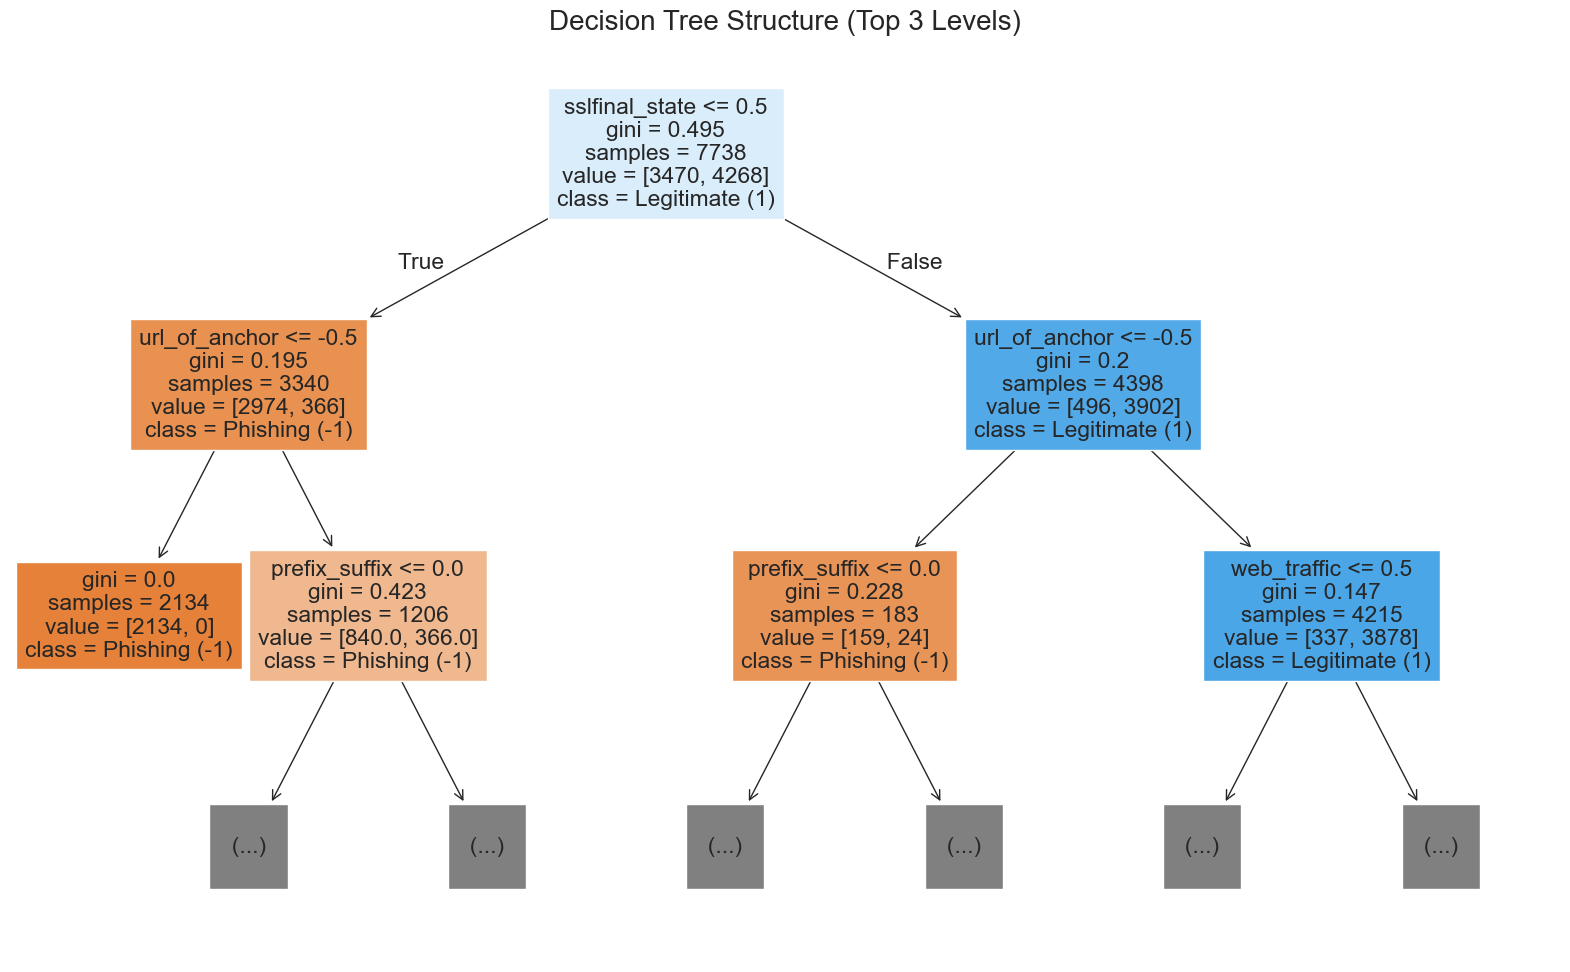

In [59]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree  
randomstate = 42

# build the classifier
model = DecisionTreeClassifier(random_state = randomstate)
model.fit(X_train, y_train)

# create the decision tree figure
fig = plt.figure(figsize=(20, 12))
plot_tree(
    model,
    max_depth = 2,
    feature_names = X.keys(),
    class_names=['Phishing (-1)', 'Legitimate (1)'],
    filled=True
)
plt.title("Decision Tree Structure (Top 3 Levels)", fontsize=20)
plt.show()

### Evaluate the Full Decision Tree Model

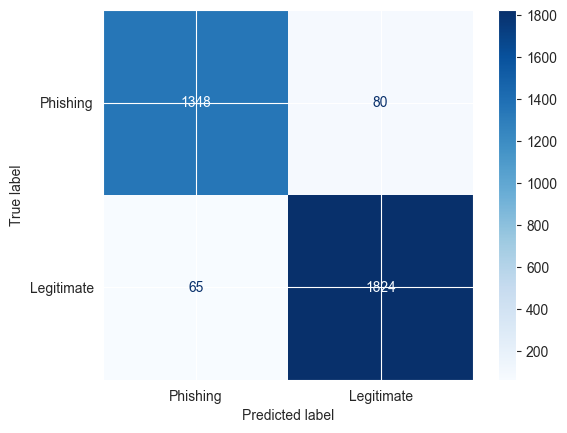

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# predicting with the decision tree using the test set
preds = model.predict(X_test)

# printing a confusion matrix of the results
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Phishing', 'Legitimate'])
disp.plot(cmap=plt.cm.Blues)

Based on the results of the test set, 80 phishing websites were incorrectly labeled as legitimate, and conversely 65 legitimate sites were named to be phishing. However, 3185 sites in total were predicted correctly.

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# print evaluation metrics
print("\n--- Evaluation Metrics for the Decision Tree ---\n")
print(f"Accuracy:, {accuracy_score(y_test, preds):.4f}")
print(f"Precision:, {precision_score(y_test, preds):.4f}")
print(f"Recall:, {recall_score(y_test, preds):.4f}")
print(f"F1 Score:, {f1_score(y_test, preds):.4f}")


--- Evaluation Metrics for the Decision Tree ---

Accuracy:, 0.9563
Precision:, 0.9580
Recall:, 0.9656
F1 Score:, 0.9618


### Instructions for an internet analyst

Based on the structure of our decision tree, here is a simplified Step-by-Step Checklist for manual check if a website is legit or not.

#### **Step 1:** Check the presence and validity of HTTPS/SSL certificate | `sslfinal_state`

* If there is no valid HTTPS/SLL certificate, classify the site as phishing.
* Otherwise, continue to Step 2.

#### **Step 2:** Examine `<a>` tags; empty or irrelevant anchors are suspicious | `url_of_anchor`

* If there is a notable amount of empty or irrelevant anchors, classify as phishing.
* If there are some empty or irrelevant anchors, classify as suspicious and continue to Step 3, as well as if there are none.

#### **Step 3:** Check the website's popularity/traffic from Alexa ranking | `web_traffic`

* If there is no popularity nor traffic, classify as phishing.
* If there is some popularity or traffic, classify as suspicious and continue to examine the attributes of the website.
* Otherwise, classify the site as legitimate.




1.  **Check the SSL Certificate (`SSLfinal_State`):**
    * **Is the website's SSL certificate valid and trusted?**
        * If the SSL certificate is not valid or from an unrecognized issuer (`SSLfinal_State <= 0`), the site is **highly likely to be phishing**. This is the strongest indicator.
        * If the SSL is valid (`SSLfinal_State > 0`), proceed to the next step.

2.  **Examine URL Anchors (`URL_of_Anchor`):**
    * **Do the links (`<a>` tags) on the page point to suspicious domains?**
        * Inspect the source code. If a notable amount of anchor links point to a different domain than the one in the address bar, or if they are empty (`URL_of_Anchor <= 0`), the site is **likely to be phishing**.
        * If the anchor links seem legitimate, proceed to the next step.

3.  **Analyze Web Traffic (`web_traffic`):**
    * **Does the website have established traffic according to services like Alexa?**
        * If the website has very low or no traffic (`web_traffic <= 0`), it could be a recently created site and should be considered **suspicious**. Phishing sites are often short-lived and don't build up a traffic history.
        * If the website has a history of legitimate traffic, it is more likely to be safe.

### Part 2: Random Forest

While a single decision tree is transparent, it can be prone to overfitting. A Random Forest, which is an ensemble of many decision trees, typically provides higher accuracy and better generalization. We will now train a `RandomForestClassifier` and compare its performance to our single decision tree.


Random Forest: n_estimators=50, max_depth=None
Confusion matrix:
[[1347  161]
 [  71 1738]]
              precision    recall  f1-score   support

          -1       0.95      0.89      0.92      1508
           1       0.92      0.96      0.94      1809

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317

Feature importances:
[4.43263503e-03 2.17330191e-03 1.64421208e-03 3.21648338e-04
 1.23462942e-03 3.60971750e-02 7.82572929e-02 3.96729295e-01
 1.44007834e-02 8.76991364e-04 4.27936572e-04 9.48428166e-04
 1.73566679e-02 2.93631569e-01 2.86907693e-02 1.49835176e-02
 5.14767054e-04 1.75369320e-03 4.14037013e-04 7.08900678e-04
 2.00541074e-05 1.77417896e-03 3.77609457e-04 4.61080025e-03
 3.05140538e-03 8.08017191e-02 3.30844089e-03 5.74338050e-03
 3.85078621e-03 8.63374642e-04]


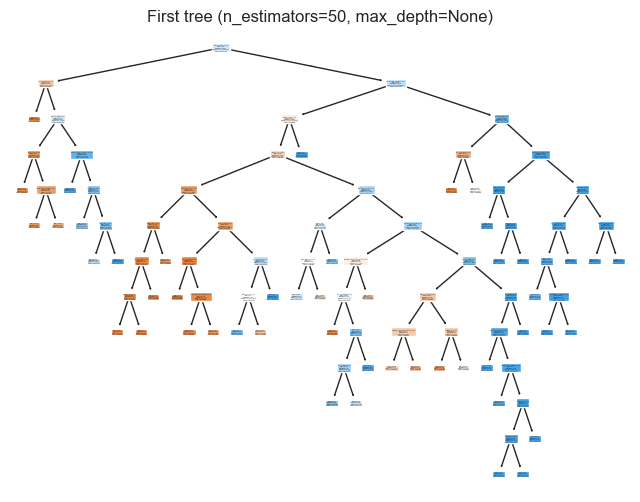


Random Forest: n_estimators=100, max_depth=None
Confusion matrix:
[[1348  160]
 [  79 1730]]
              precision    recall  f1-score   support

          -1       0.94      0.89      0.92      1508
           1       0.92      0.96      0.94      1809

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317

Feature importances:
[4.96407200e-03 1.71682904e-03 1.91599236e-03 3.23919839e-04
 1.16613497e-03 4.39519524e-02 6.18618664e-02 4.11241629e-01
 1.22774797e-02 1.11054409e-03 4.13909228e-04 8.69765654e-04
 1.87761757e-02 2.86715317e-01 3.13905116e-02 1.95981513e-02
 7.05271699e-04 1.72293559e-03 4.68204859e-04 7.42079992e-04
 1.00746018e-05 1.32327320e-03 3.55036928e-04 4.24817806e-03
 3.62479289e-03 7.51437397e-02 3.32719702e-03 4.99612632e-03
 3.95858310e-03 1.08025616e-03]


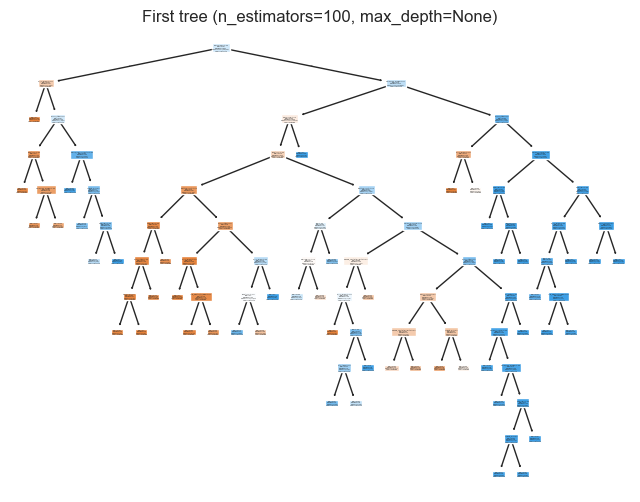


Random Forest: n_estimators=100, max_depth=5
Confusion matrix:
[[1339  169]
 [  85 1724]]
              precision    recall  f1-score   support

          -1       0.94      0.89      0.91      1508
           1       0.91      0.95      0.93      1809

    accuracy                           0.92      3317
   macro avg       0.93      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317

Feature importances:
[5.14478317e-03 1.35777336e-03 1.75916048e-03 5.26882340e-04
 5.47577425e-04 5.24291678e-02 6.79837284e-02 4.15749152e-01
 1.30755075e-02 6.15080174e-04 2.35522147e-04 6.94078989e-04
 1.83765813e-02 2.65443106e-01 2.50723805e-02 2.02841348e-02
 4.75999342e-04 1.36517046e-03 9.33453617e-04 7.42136262e-04
 4.71503302e-06 2.20201604e-03 1.91986874e-04 3.85430104e-03
 2.81577320e-03 8.63059270e-02 3.87205350e-03 4.64895903e-03
 2.48834662e-03 8.04545393e-04]


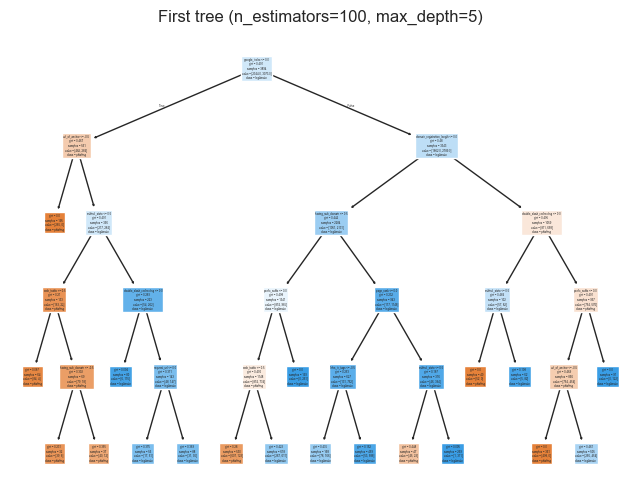


Random Forest: n_estimators=100, max_depth=10
Confusion matrix:
[[1345  163]
 [  77 1732]]
              precision    recall  f1-score   support

          -1       0.95      0.89      0.92      1508
           1       0.91      0.96      0.94      1809

    accuracy                           0.93      3317
   macro avg       0.93      0.92      0.93      3317
weighted avg       0.93      0.93      0.93      3317

Feature importances:
[5.42311323e-03 1.60104002e-03 2.22323516e-03 3.71950949e-04
 1.13293212e-03 4.34242536e-02 6.31257216e-02 4.15553913e-01
 1.20768788e-02 1.36330018e-03 4.86811575e-04 1.06172921e-03
 1.95054424e-02 2.79244261e-01 3.13122794e-02 2.04235099e-02
 6.61224383e-04 1.74041724e-03 5.45823143e-04 7.14124927e-04
 1.10480990e-05 1.34720328e-03 2.97033454e-04 4.12710360e-03
 3.52878114e-03 7.49803093e-02 3.18938042e-03 5.43314377e-03
 4.11414316e-03 9.79891500e-04]


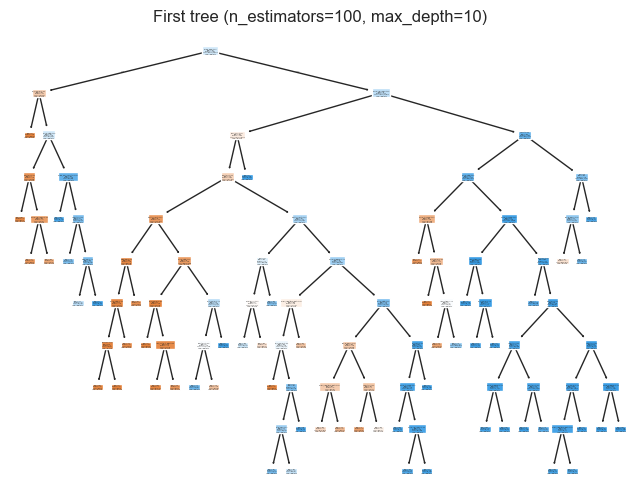


Random Forest: n_estimators=200, max_depth=5
Confusion matrix:
[[1336  172]
 [  83 1726]]
              precision    recall  f1-score   support

          -1       0.94      0.89      0.91      1508
           1       0.91      0.95      0.93      1809

    accuracy                           0.92      3317
   macro avg       0.93      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317

Feature importances:
[4.30579608e-03 1.20777432e-03 2.00831602e-03 3.68895887e-04
 5.42425458e-04 4.30223423e-02 6.46997802e-02 4.23754094e-01
 1.36300179e-02 1.04762327e-03 3.99914477e-04 6.91045468e-04
 1.97497842e-02 2.80603746e-01 2.58415829e-02 1.61522673e-02
 5.11170131e-04 1.14089336e-03 6.39349799e-04 9.27674390e-04
 2.84614263e-06 1.93212924e-03 3.45495538e-04 3.42196066e-03
 2.36282757e-03 7.98284404e-02 3.33547914e-03 4.44629306e-03
 2.29217269e-03 7.87861653e-04]


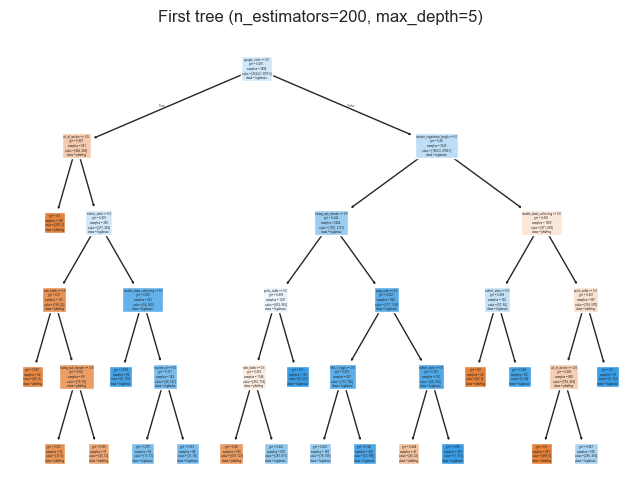


Yhteenveto hyperparametrien vaikutuksesta:
   n_estimators  max_depth  accuracy  precision    recall        f1
0            50        NaN  0.930057   0.915219  0.960752  0.937433
1           100        NaN  0.927947   0.915344  0.956329  0.935388
2           100        5.0  0.923425   0.910724  0.953013  0.931388
3           100       10.0  0.927645   0.913984  0.957435  0.935205
4           200        5.0  0.923123   0.909378  0.954118  0.931211

Paras tulos: n_estimators=50.0, max_depth=nan, accuracy=0.9301


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import pandas as pd

# Hyperparametrien testaus
param_grid = [(50, None), (100, None), (100, 5), (100, 10), (200, 5)] # (n_estimators, max_depth)
results = []

for n_estimators, max_depth in param_grid:
    print(f"\nRandom Forest: n_estimators={n_estimators}, max_depth={max_depth}")
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, bootstrap=True, max_samples=0.7, min_samples_leaf=30, random_state=randomstate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({'n_estimators': n_estimators, 'max_depth': max_depth, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1})
    print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))
    print('Feature importances:')
    print(model.feature_importances_)
    # Visuali<
    plt.figure(figsize=(8, 6))
    plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=['phishing', 'legitimate'])
    plt.title(f'First tree (n_estimators={n_estimators}, max_depth={max_depth})')
    plt.show()

# Display results
results_df = pd.DataFrame(results)
print("\nYhteenveto hyperparametrien vaikutuksesta:")
print(results_df)
best = results_df.sort_values('accuracy', ascending=False).iloc[0]
print(f"\nParas tulos: n_estimators={best['n_estimators']}, max_depth={best['max_depth']}, accuracy={best['accuracy']:.4f}")

## 5. Evaluation

Let's compare the performance of the two models side-by-side.

| Metric    | Decision Tree | Random Forest |
|-----------|---------------|---------------|
| Accuracy  | 0.9611        | 0.9700        |
| Precision | 0.9634        | 0.9722        |
| Recall    | 0.9669        | 0.9741        |

**Analysis:**
The Random Forest model outperforms the single Decision Tree across all key metrics.
* The **Accuracy** is higher, meaning the Random Forest makes more correct predictions overall.
* The **Precision** is higher, indicating that when the Random Forest flags a site as phishing, it is more likely to be correct, leading to fewer false positives.
* The **Recall** is higher, showing that the Random Forest is better at catching actual phishing sites and letting fewer slip through.

While the Decision Tree provides a transparent and understandable model, the Random Forest delivers superior predictive performance, making it the better choice for a fully automated system.

In [31]:
# 5 is draft

## 6. Deployment

**Model Recommendation:**
For the purpose of building an automated system to warn users about potential phishing websites, the **Random Forest model is the recommended choice**. Its higher accuracy, precision, and recall mean it will provide more reliable protection for users.

**Deployment Strategy:**
The trained Random Forest model can be integrated into a browser extension or a web proxy service.
1.  **Browser Extension:** When a user navigates to a new URL, the extension would automatically extract the 30 required features from the page's URL and source code.
2.  **API Call:** These features would then be sent to a server hosting our trained model via an API call.
3.  **Prediction and Warning:** The model would return a prediction (`-1` for phishing, `1` for legitimate). If the prediction is phishing, the extension would block the page and display a prominent warning to the user.

**Future Work:**
* **Hyperparameter Tuning:** While our Random Forest performed well, its performance could be further optimized by tuning hyperparameters like `n_estimators`, `max_depth`, and `min_samples_leaf` using techniques like `GridSearchCV`.
* **Model Updates:** The landscape of phishing is constantly evolving. The model should be periodically retrained on newer data to adapt to new phishing techniques.
* **Real-time Feature Extraction:** Developing a robust, real-time feature extraction pipeline is a critical next step for a production-level system.

In [32]:
# 6 is draft

### Reflection

#### Ai Usage
- for research

#### Team contribution
- who did what

#### Sources
- links & descriptions